In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
pred_dir = 'parsed_data2'
truth_dr = 'datafile/vds별 엑셀/'

In [3]:
def set_vds(vds):
    if -61 < vds < -56:
        vds = -60
    elif -56 < vds < -51:
        vds = -55
    elif -51 < vds < -46:
        vds = -50
    elif -46 < vds < -41:
        vds = -45
    elif -41 < vds < -36:
        vds = -40
    elif -36 < vds < -31:
        vds = -35
    elif -31 < vds < -26:
        vds = -30
    elif -26 < vds < -21:
        vds = -25
    elif -21 < vds < -16:
        vds = -20
    elif -16 < vds < -11:
        vds = -15
    elif -11 < vds < -6:
        vds = -10
    elif -6 < vds < -1:
        vds = -5
    elif -1 < vds < 4:
        vds = 0
    elif 4 < vds < 9:
        vds = 5
    elif 9 < vds < 14:
        vds = 10
    elif 14 < vds:
        vds = 15
    return vds

In [4]:

pred_files = glob.glob(os.path.join(pred_dir, '*.csv'))
truth_files = glob.glob(os.path.join(truth_dr, '*.xlsx'))


In [5]:
pred_dict = {}

for i, f in enumerate(pred_files):
    vds = os.path.split(f)[-1].split('_')[5]
    vds = set_vds(vds=float(vds))
    df = pd.read_csv(f)

    all_pdf = df if i ==0 else pd.concat([all_pdf, df])

    if str(vds) in pred_dict.keys():
        tmp = pred_dict[str(vds)]
        pred_dict[str(vds)] = pd.concat([tmp, df],axis=0)
    else:
        pred_dict[str(vds)] = df


In [6]:
truth_dict = {}

for i, tf in enumerate(truth_files):
    vds = os.path.split(tf)[-1].split('_')[-3]
    df = pd.read_excel(tf,header=None)
    if 'Vds' in df.values[0]:
        df = df.iloc[1:, :]
    df.columns = ['vgs','I','vds']

    all_tdf = df if i ==0 else pd.concat([all_tdf, df])
    if str(vds) in truth_dict.keys():
        tmp = truth_dict[str(vds)]
        truth_dict[str(vds)] = pd.concat([tmp, df], axis=0)
    else:
        truth_dict[str(vds)] = df


d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [44]:

all_pdf = all_pdf.sort_values(['vds', 'vgs']).reset_index(drop=True)
all_tdf = all_tdf.sort_values(['vds', 'vgs']).reset_index(drop=True)


In [8]:
for k, v in pred_dict.items():
    pred_dict[k] = v.sort_values(['vgs']).reset_index(drop=True)
    truth_dict[k] = truth_dict[k].sort_values(['vgs']).reset_index(drop=True)


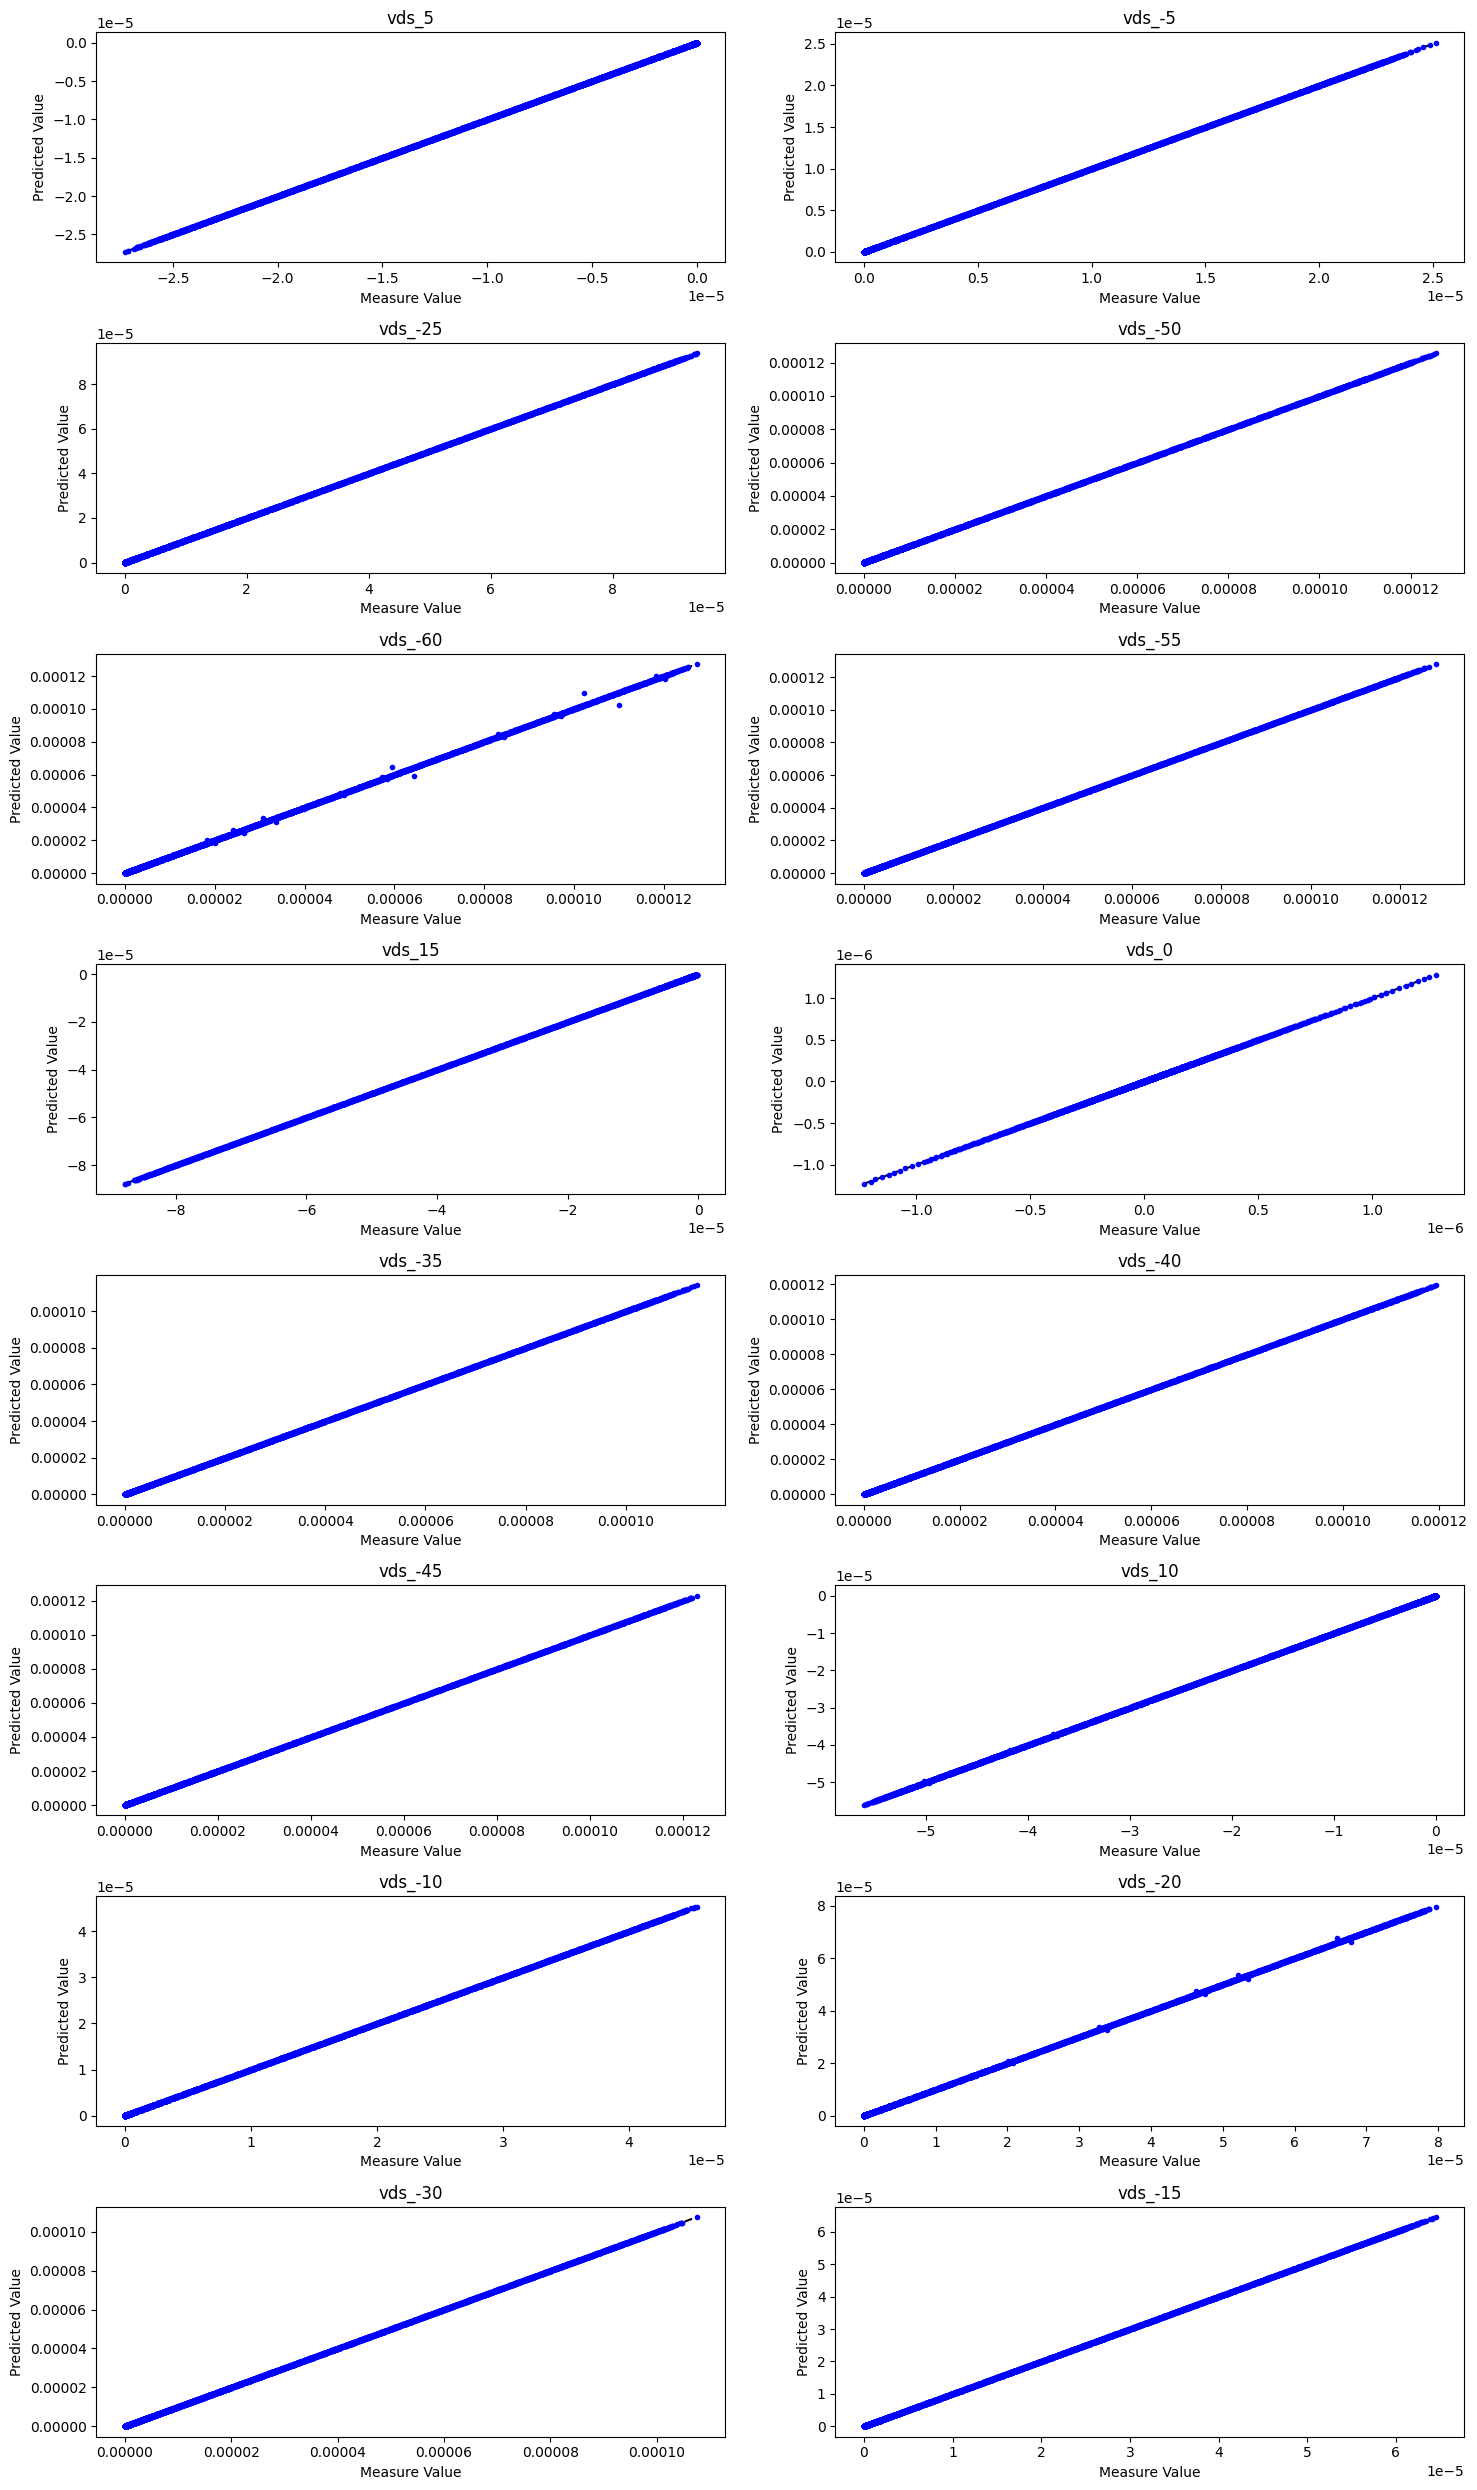

In [9]:
fig, ax= plt.subplots(len(pred_dict.keys())//2, 2, figsize=(15,25))
pred_df = None
for i,k in enumerate(pred_dict.keys()):
    pred_df = pd.DataFrame(pred_dict[k]['I'])

    pred_df.columns = ['Pred_I']
    all_df = pred_df

    all_df['Truth'] = truth_dict[k]['I']
    if i + 1 <= (len(pred_dict.keys())//2):
        ax[i][0].plot([min(all_df['Truth']), max(all_df['Truth'])], [min(all_df['Truth']), max(all_df['Truth'])], 'k--')
        ax[i][0].plot(all_df['Truth'], all_df['Pred_I'], 'b.', label='Prediction Set')
        ax[i][0].set_xlabel('Measure Value')
        ax[i][0].set_ylabel('Predicted Value')
        
        ax[i][0].set_title(f'vds_{k}')
    else:
        ax[i-len(pred_dict.keys())//2][1].plot([min(all_df['Truth']), max(all_df['Truth'])], [min(all_df['Truth']), max(all_df['Truth'])], 'k--')
        ax[i-len(pred_dict.keys())//2][1].plot(all_df['Truth'], all_df['Pred_I'], 'b.', label='Prediction Set')
    
        ax[i-len(pred_dict.keys())//2][1].set_xlabel('Measure Value')
        ax[i-len(pred_dict.keys())//2][1].set_ylabel('Predicted Value')
        ax[i-len(pred_dict.keys())//2][1].set_title(f'vds_{k}')
plt.tight_layout() 

# print()

In [47]:
pred_all = pd.DataFrame(all_pdf['I'])
pred_all.columns = ['Pred_I']
vds_all = pred_all
vds_all['Truth'] = all_tdf['I']

In [48]:
vds_all

Pred_I     Truth
0       1.183228e-04  0.000118
1       1.135750e-04  0.000114
2       1.089223e-04  0.000109
3       1.043657e-04  0.000104
4       9.990580e-05    0.0001
...              ...       ...
101537 -1.240515e-06 -0.000001
101538 -9.018701e-07 -0.000001
101539 -6.337390e-07 -0.000001
101540 -4.301245e-07      -0.0
101541 -2.829588e-07      -0.0

[101542 rows x 2 columns]

In [52]:
sample_num = 1000

vds_sample = vds_all.sample(n=sample_num).sort_index()


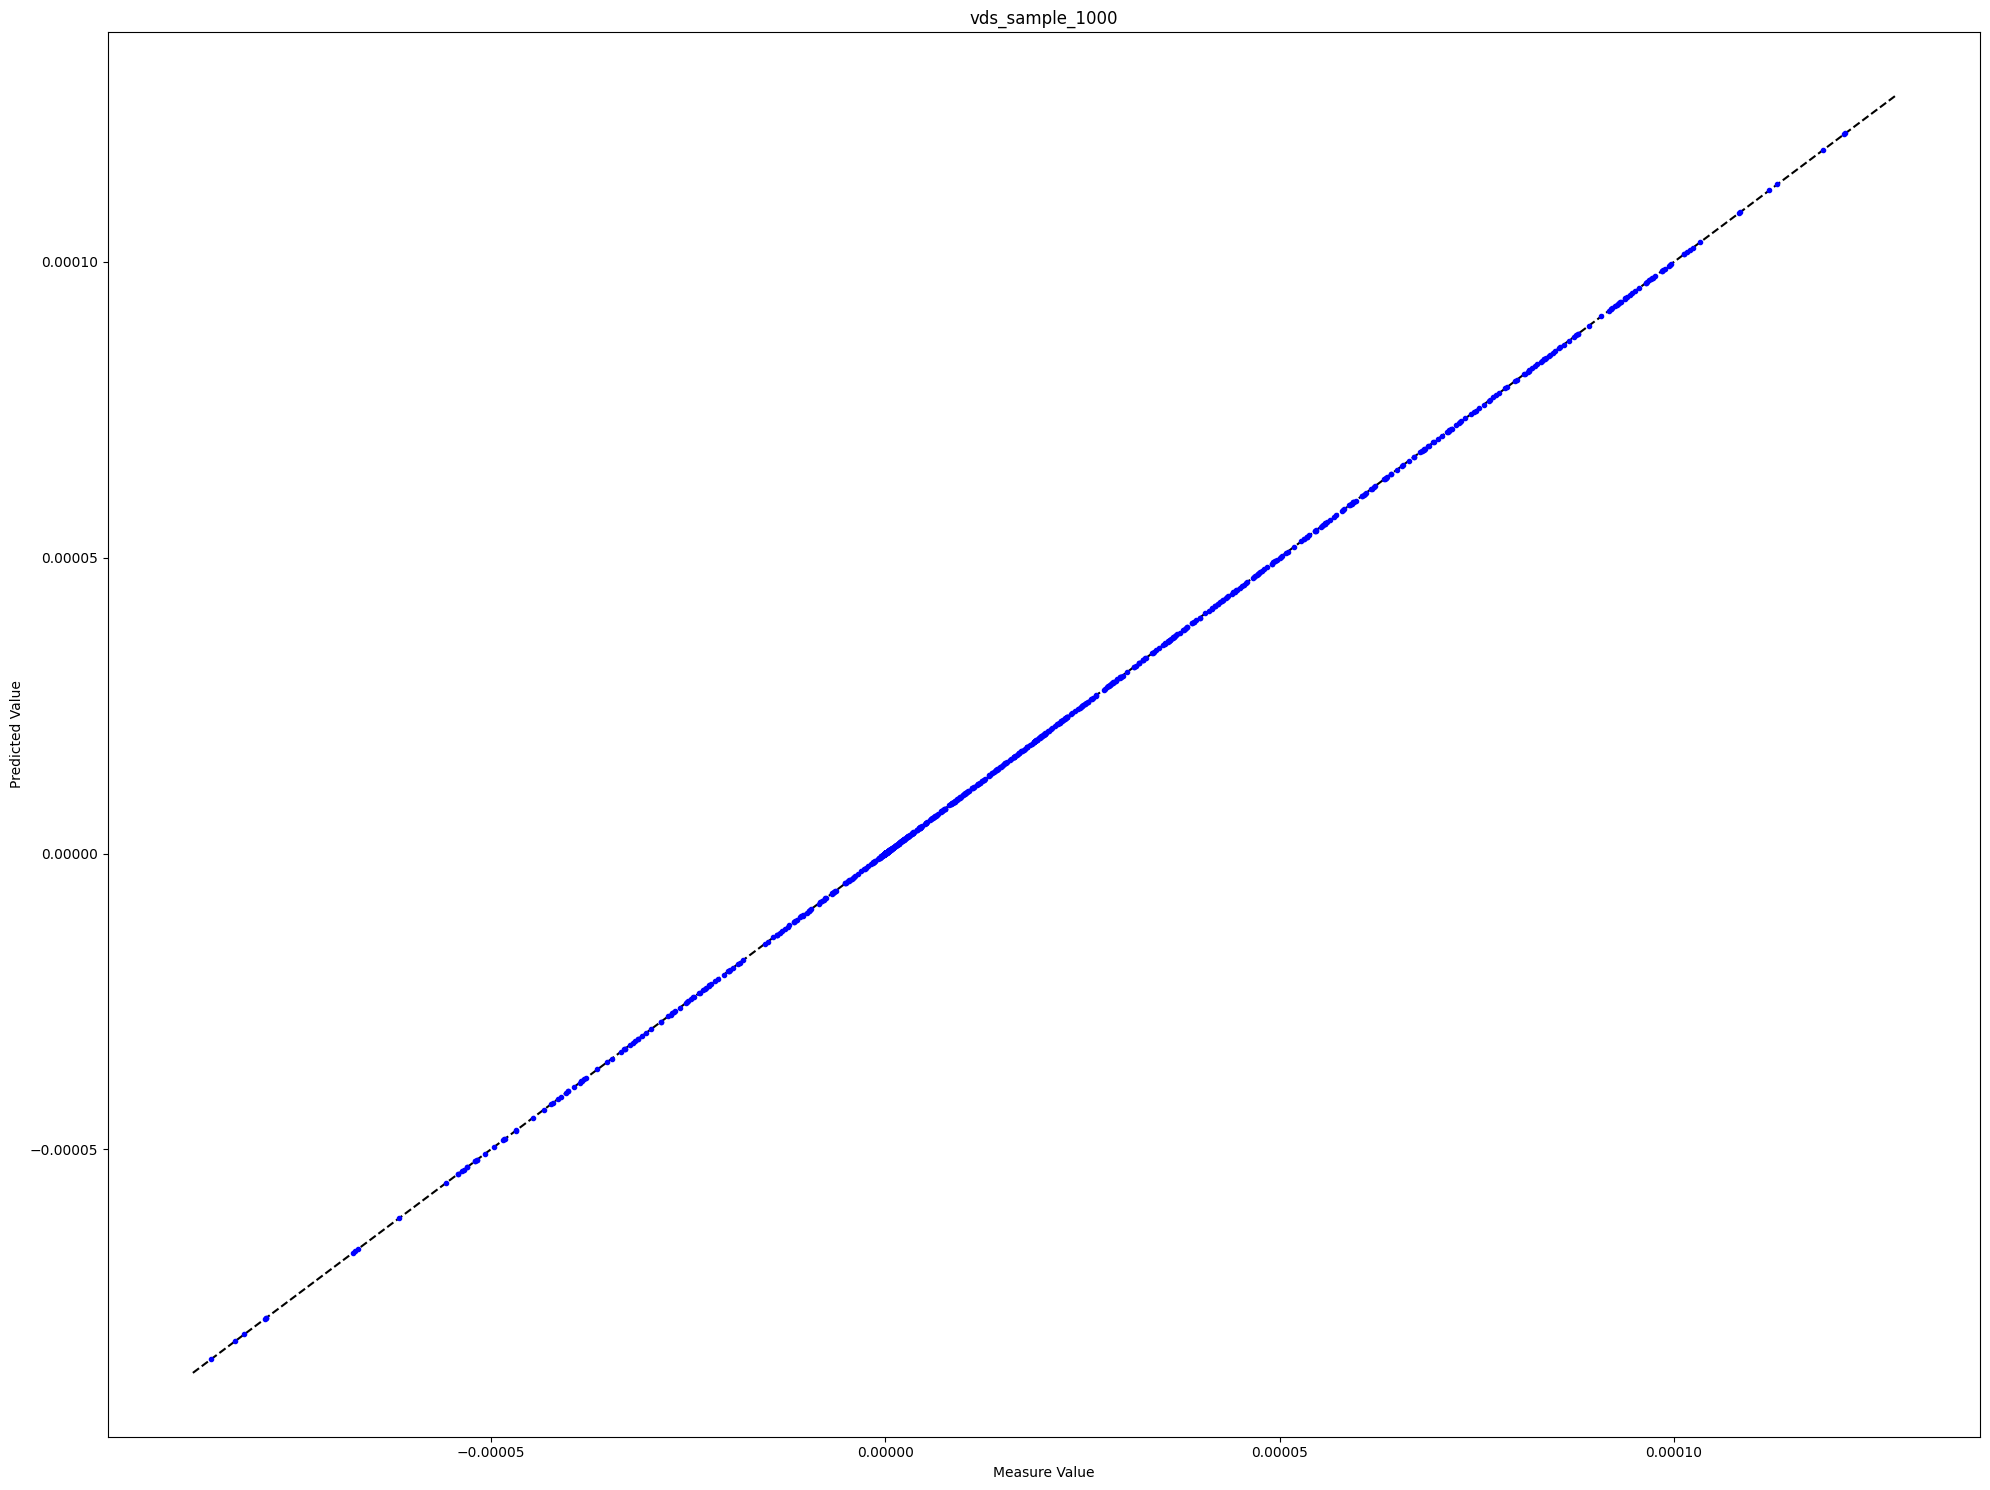

In [53]:
fig2, ax2= plt.subplots(1,1, figsize=(20,15))
ax2.plot([min(vds_all['Truth']), max(vds_all['Truth'])], [min(vds_all['Truth']), max(vds_all['Truth'])], 'k--')
ax2.plot(vds_sample['Truth'], vds_sample['Pred_I'], 'b.', label='Prediction Set')
ax2.set_xlabel('Measure Value')
ax2.set_ylabel('Predicted Value')
ax2.set_title(f'vds_sample_{sample_num}')
plt.tight_layout() 